In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline


# Распределение Парето

Про распределение Парето можно почитать, например, [тут](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2%D0%B5%D1%80%D0%BE%D1%8F%D1%82%D0%BD%D0%BE%D1%81%D1%82%D0%B5%D0%B9)
и [тут](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9F%D0%B0%D1%80%D0%B5%D1%82%D0%BE)


Среднее: E[x]=x(m) * k / k−1, где x(m)-минимальное значение, а k -> это параметр b - "коэффициент кривизны")

Дисперсия: D[x]=((x(m)/ k−1) ** 2) * (k / k−2) , при k > 2.

In [12]:
# функция для подсчета мат ожидания
def count_m(x_m, k):
    return (x_m * k) / (k-1)

# функция для вычисления дисперсии Парето
def count_d(x_m, k):
    return ((x_m / (k-1)) ** 2) * (k / (k-2))

def count_scale(d, n):
# сигма для нормального распределения выборки средних
    scale = np.math.sqrt(d / n)

    return scale

Text(0.5, 0, 'x')

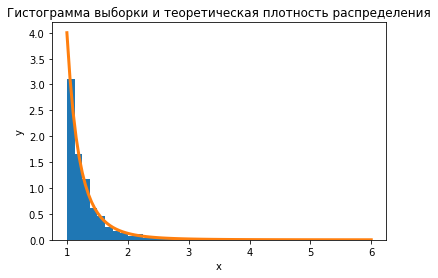

In [13]:
b = 4 # k -> это параметр b - "коэффициент кривизны"
m = count_m(1, b) # считаем мат ожидание Парето
d = count_d(1, b) # считаем дисперсии Парето

pareto = sts.pareto(b = b) # задаем функцию
pareto_data = pareto.rvs(size=1000) # создаем случайную выборку 1000 значений

x = np.linspace(1, 6, 100) # массив точек для построения плотности распределения
y = pareto.pdf(x) # вычисляем значения плотности распределения от выборки

plt.hist(pareto_data, bins=40, density=True, range=(1, 6)) #
plt.plot(x, y, lw = 3)
plt.title('Гистограмма выборки и теоретическая плотность распределения')
plt.ylabel('y')
plt.xlabel('x')

In [14]:
n = [5, 10, 50, 100]
means_arr = []

# ниже цикл для генерации выборок количества n, определения выборочных средних,
# и записи новых значений в массив

for i in n:
    for j in range(0, 1000):
        pareto_data = pareto.rvs(size= i)
        means_arr.append(np.mean(pareto_data))

Text(0.5, 0, 'x')

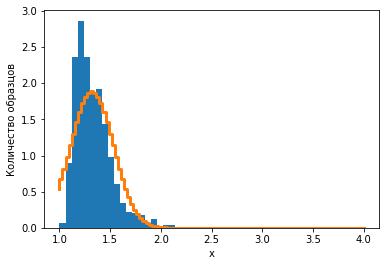

In [15]:
# Оценим распределение выборочного среднего случайной величины при
# разных объёмах выборок

# n = 5

scale = count_scale(d, n[0]) # сигма для нормального распределения выборки средних
norm = sts.norm(m, scale) # определение нормального распределения с расчетными характеристиками Парето

x = np.linspace(1, 4, 100)
pdf = norm.pdf(x) # плотность распределения

plt.hist(means_arr[0:1000], density=True, bins=50, range=(1,4))
plt.step(x, pdf, lw = 3)
plt.ylabel('Количество образцов')
plt.xlabel('x')

Text(0.5, 0, 'x')

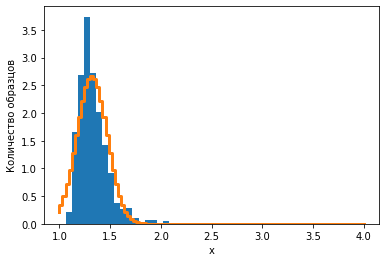

In [16]:
# тут проделываем все тоже самое что и выше только для n = 10

scale = count_scale(d, n[1])
norm = sts.norm(m, scale)

x = np.linspace(1, 4, 100)
pdf = norm.pdf(x)

plt.hist(means_arr[1000:2000], density=True, bins=50, range=(1,4))
plt.step(x, pdf, lw = 3)
plt.ylabel('Количество образцов')
plt.xlabel('x')

Text(0.5, 0, 'x')

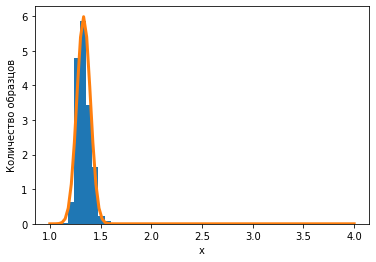

In [17]:
# тут проделываем все тоже самое что и выше только для n = 50

scale = count_scale(d, n[2])
norm = sts.norm(m, scale)

x = np.linspace(1, 4, 100)
pdf = norm.pdf(x)

plt.hist(means_arr[2000:3000], density=True, bins=50, range=(1,4))
plt.plot(x, pdf, lw = 3)
plt.ylabel('Количество образцов')
plt.xlabel('x')

Text(0.5, 0, 'x')

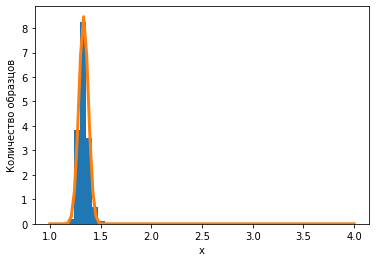

In [18]:
# тут проделываем все тоже самое что и выше только для n = 100

scale = count_scale(d, n[3])
norm = sts.norm(m, scale)

x = np.linspace(1, 4, 100)
pdf = norm.pdf(x)

plt.hist(means_arr[3000:4000], density=True, bins=50, range=(1,4))
plt.plot(x, pdf, lw = 3)
plt.ylabel('Количество образцов')
plt.xlabel('x')

# приближение распределения выборочных средних с помощью нормального
# распределения улучшаешься при увеличении числа N